## Loading pregenerated signals

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

from scipy.io import loadmat

import numpy as np

import matplotlib.pyplot as plt

from collections import defaultdict

# import pyvista as pv

In [3]:
names = ['nossnoMF', 'nossMF', 'ssMF', 'ssnoMF']

data = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['data'].transpose() for key in names
}

param = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['params'] for key in names
}

param = {
    key: {
        param[key].dtype.names[i]: param[key][0, 0][i] for i in range(len(param[key][0, 0]))
    }
    for key in param
}

In [213]:
key = 'ssMF'

In [214]:
X = data[key].copy()

j1 = 3
j2 = 9
p_exp=2
gamint = .5

scaling_ranges = [(j1, j2)]

In [215]:
from pymultifracs import wavelet_analysis
from pymultifracs.bivariate import bimfa

In [216]:
WT = wavelet_analysis(X)

In [217]:
WT.get_nj_interv(1, 15).shape

(15, 2)

In [218]:
WT = WT.get_leaders(2, gamint=.75)

In [219]:
param[key]

{'nbcopies': array([[1]], dtype=uint8),
 'FBM': array([[0]], dtype=uint8),
 'H': array([[0.6, 0.8]]),
 'Correl': array([[ 1. , -0.8],
        [-0.8,  1. ]]),
 'correlation': array([[-0.8]]),
 'mft': array([[0.17320508, 0.17320508, 0.7       ]]),
 'Sigma2': array([[1, 1]], dtype=uint8),
 'nbsamples': array([[262144]], dtype=int32),
 'T': array([[0, 1]], dtype=uint8),
 'W': array([[1, 0],
        [0, 1]], dtype=uint8),
 'Nwt': array([[2]], dtype=uint8),
 'j1': array([[6]], dtype=uint8),
 'j2': array([[13]], dtype=uint8),
 'alpha': array([[0.05]]),
 'FigNum': array([[0]], dtype=uint8),
 'wtype': array([[1]], dtype=uint8)}

In [220]:
lwt = bimfa(WT, WT, scaling_ranges, q1=[0, 1, 2], q2=[0, 1, 2], weighted=None)

In [221]:
np.sqrt(-lwt.cumulants.c20[0, 0, 1, 0]) - param[key]['mft'][0, 0]

0.006507215475340528

In [222]:
lwt.cumulants.rho_mf

array([[[[1.        ],
         [0.71314563]],

        [[0.71314563],
         [1.        ]]]])

In [223]:
lwt.cumulants.c20

array([[[[-0.03229651],
         [-0.03229651]],

        [[-0.02707258],
         [-0.02707258]]]])

In [224]:
lwt.cumulants.c11

array([[[[-0.03229651],
         [-0.02108729]],

        [[-0.02108729],
         [-0.02707258]]]])

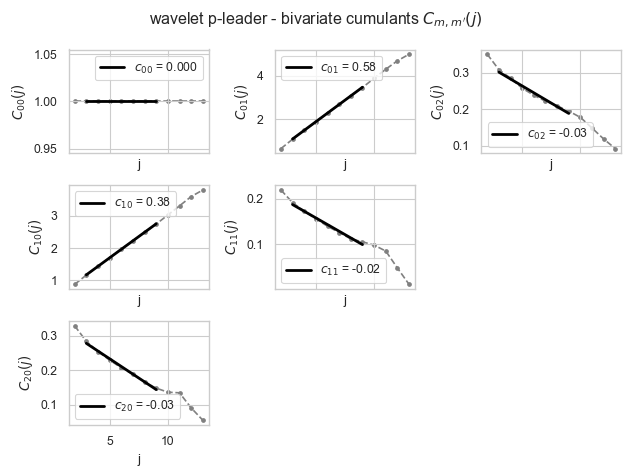

In [225]:
lwt.cumulants.plot(signal_idx1=0, signal_idx2=1, j1=2, j2=13)

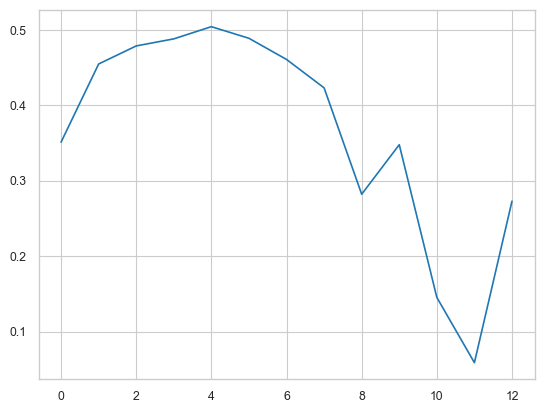

In [115]:
plt.plot(lwt.cumulants.RHO_MF[:13, 0, 0, 1, 0])

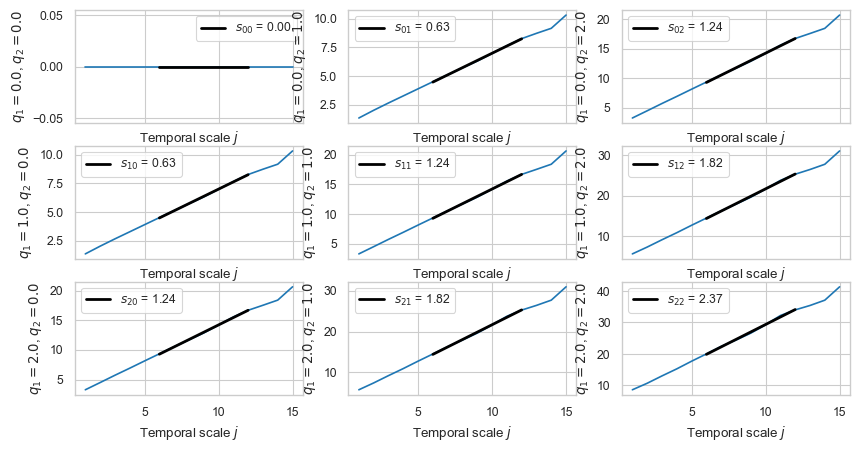

In [101]:
lwt.structure.plot(figsize=(10, 5))

In [102]:
def plot_key(key, plot=True):
    
    X = data[key].copy()

    j1 = 3
    j2 = 8
    p_exp=2
    gamint = 1

    scaling_ranges = [(j1, j2)]

    dwt, lwt = bivariate_analysis_full(
        X[:, 0], X[:, 1], scaling_ranges, p_exp=p_exp, gamint=gamint,
        weighted=None, n_cumul=2, q1=np.array([0, 1, 2]),
        q2=np.array([0, 1, 2]), R=1)

    if not plot:
        return dwt, lwt
    
    print(f'{lwt.cumulants.rho_mf=}')
    print(f'{lwt.cumulants.c20}')
    print(f'{lwt.cumulants.c02}')

    lwt.cumulants.plot(j1=j1)
    # fig_m.suptitle(key)
    # fig_c.suptitle(key)
    # lwt.cumulants.plot_legendre(resolution=30)
    # plt.suptitle(key)
    # plt.show()
    
    plt.figure()
    plt.plot(dwt.structure.j, dwt.structure.coherence, label='second order (wavelet) coherence')
    plt.plot(lwt.cumulants.j, lwt.cumulants.RHO_MF, label=r'multifractal (leader) coherence')
    plt.xlabel('j')
    plt.title(key)
    plt.legend()
    plt.show()

    # lwt.cumulants.plot_legendre_pv()
    
    return dwt, lwt

lwt.cumulants.rho_mf=array([-0.07785503])
[-0.03505511]
[-0.0354132]


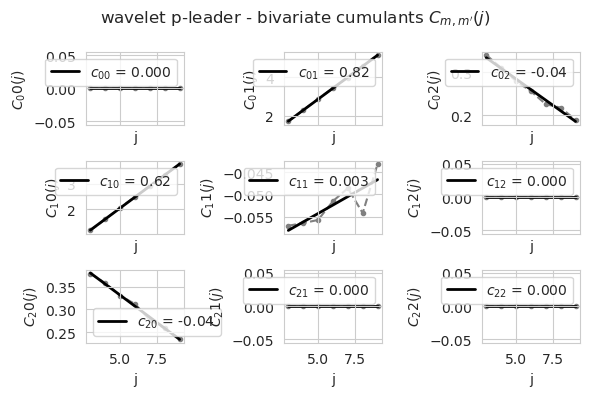

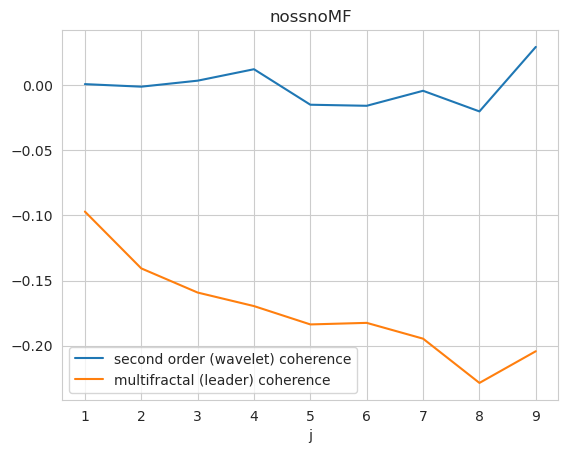

lwt.cumulants.rho_mf=array([0.80463939])
[-0.02827499]
[-0.02980695]


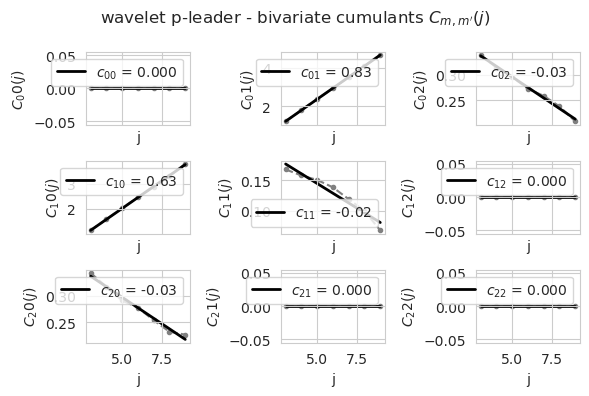

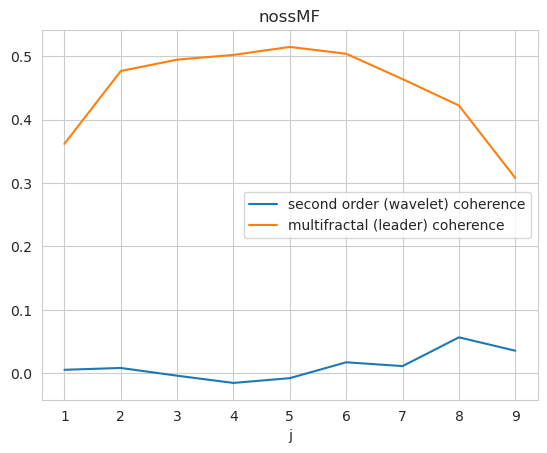

lwt.cumulants.rho_mf=array([0.69728482])
[-0.03002242]
[-0.02489817]


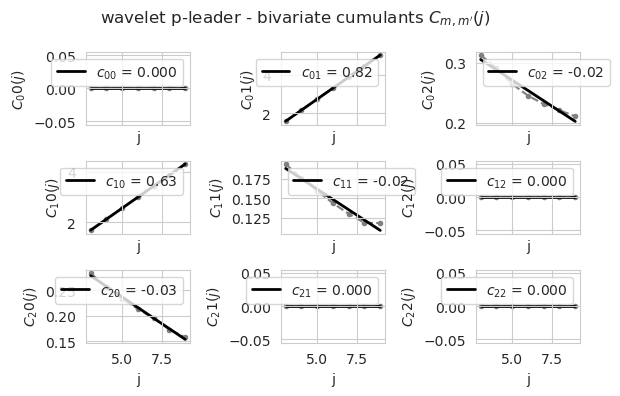

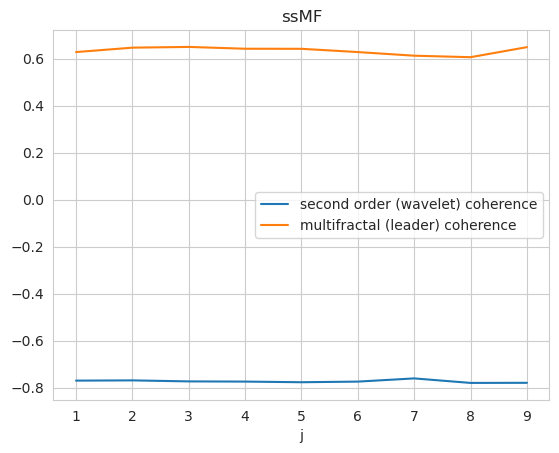

lwt.cumulants.rho_mf=array([-0.09315478])
[-0.02741859]
[-0.02453828]


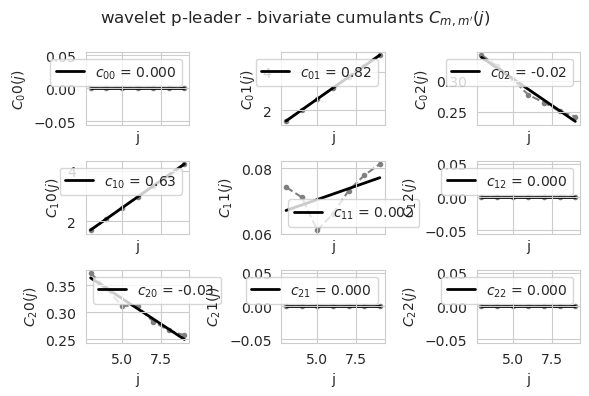

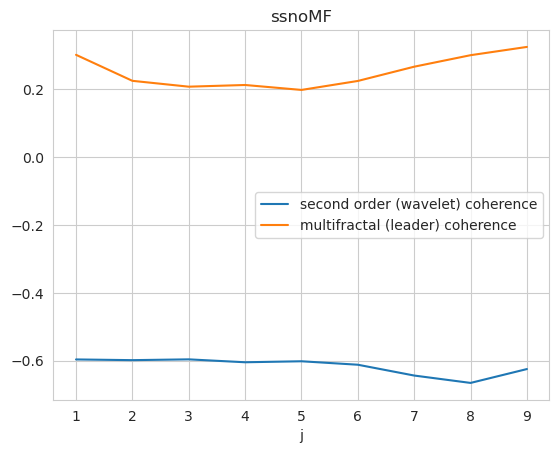

In [11]:
for key in data:
    plot_key(key)